# loss, perp をプロット

### やったこと
- (2/12) latent = 200 と 100 を比較したがほぼ差なし  
    したがって表現力は latent = 100 で十分？  
    -> データセットを増やしたときは不明
    
- n_unit = n_embed = 300 で十分かどうかは要確認  

- (2/14) 学習に時間がかかりすぎるため、batchsize x2, k /2 として epoch の進みを2倍にした  
    -> 26 epoch 付近で perp が無限大になってしまった。原因として考えられるのは、
        + k/2 にしたのが不安定性の要因になった  
                -> (2/15) kを戻してもダメだった
        + このデータセットの多様性を表現するには n_unit or n_latent が足りない  
                -> 可能性大
                
- (2/15) max-source-sentence = 50 だと再現度が低い気がする  
    -> 30 にし、さらに n_unit = n_embed = 400 にして学習. データセットは 18000程度  


### TODO

- encoder に Bi-directional LSTM を使う
- ビームサーチ
- Stacked LSTM VAE

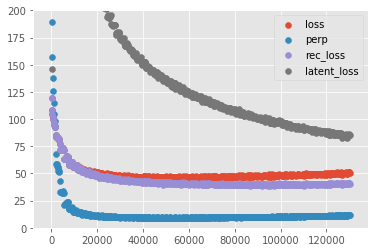

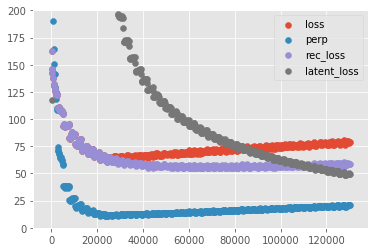

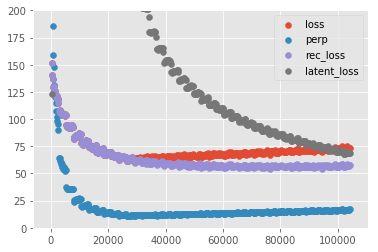

In [170]:
%matplotlib inline

#coding: utf-8
import matplotlib.pyplot as plt
import numpy as np
import os
import json
plt.style.use('ggplot') 

# グラフ
def plot_loss_perp(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    iter = [d["iteration"] for d in log]
    epoch = [d["epoch"] for d in log]
    loss = [d["main/loss"] for d in log]
    perp = [d["main/perp"] for d in log]
    
    plt.scatter(iter, loss, label="loss")
    plt.scatter(iter, perp, label="perp")
    
    try:
        rec_loss = [d["main/rec"] for d in log]
        latent_loss = [d["main/lat"] for d in log]
        plt.scatter(iter, rec_loss, label="rec_loss")
        plt.scatter(iter, latent_loss, label="latent_loss")
    except:
        pass
    
    plt.legend()
    plt.ylim([0, 200])
    plt.show()

plot_loss_perp()
plot_loss_perp(result_dir = 'result_0208_C041/') #word_drop=0.3
plot_loss_perp(result_dir = 'result_0209_C024/') #word_drop=0.38


# bleu, rouge-l (p, r, f)をプロット

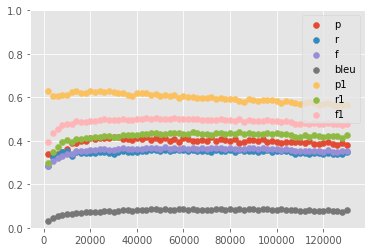

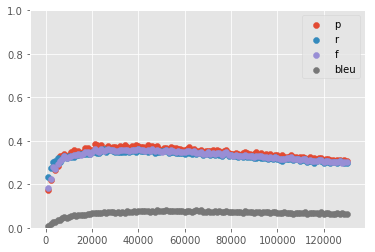

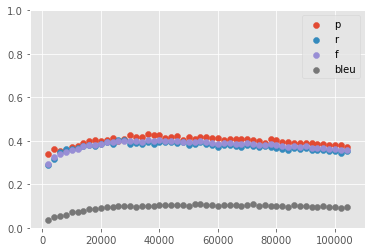

In [171]:
def plot_bleu(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    # bleu があるリストだけ取り出す
    log_b = []
    for d in log:
        if 'bleu' in d.keys():
            log_b.append(d)
            
    iter = [d["iteration"] for d in log_b]
    p = [d["p"] for d in log_b]
    r = [d["r"] for d in log_b]
    f = [d["f"] for d in log_b]
    bleu = [d["bleu"] for d in log_b]
    
    plt.scatter(iter, p, label="p")
    plt.scatter(iter, r, label="r")
    plt.scatter(iter, f, label="f")
    plt.scatter(iter, bleu, label="bleu")
    
    try:
        p1 = [d["p1"] for d in log_b]
        r1 = [d["r1"] for d in log_b]
        f1 = [d["f1"] for d in log_b]
        plt.scatter(iter, p1, label="p1")
        plt.scatter(iter, r1, label="r1")
        plt.scatter(iter, f1, label="f1")
    except:
        pass

    plt.legend()
    plt.ylim([0.0, 1.0])
    plt.show()
    
plot_bleu()
plot_bleu(result_dir = 'result_0208_C041/')
plot_bleu(result_dir = 'result_0209_C024/')


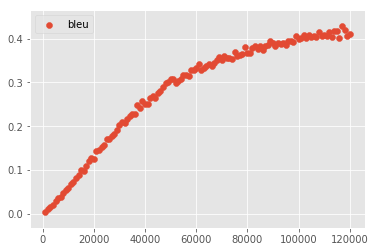

In [28]:
def plot_bleu_old(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    iter = []
    bleu = []
    for d in log:
        if "validation/main/bleu" in d:
            iter.append(d["iteration"])
            bleu.append(d["validation/main/bleu"])
    
    plt.scatter(iter, bleu, label="bleu")
    plt.legend()
    plt.show()
    
plot_bleu_old(result_dir = 'result_ae_0120')